# Generate a world-wide grid, and the features for each point

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import jusipy

In [3]:
GLCF = jusipy.latlong_features.GLCF(resolution='8km')
CLL = jusipy.GIS.CountryLatLong()

Loading GLCF(8km)                                                                                                    

## Generate the grid

In [4]:
def make_grid(lat_scale):

    # Generate the grid
    land_grid = pd.DataFrame(jusipy.GIS.sample.grid_latlong(land=True, glcf=GLCF, lat_points=lat_scale),
                             columns=['lat', 'long'])

    # Attach the country in which the point lies
    land_grid_countries = CLL.get(list(land_grid.values))
    land_grid['country'] = land_grid_countries

    # Remove points without a country
    land_grid_wrong = land_grid[pd.isna(land_grid.country)]
    land_grid = land_grid[~pd.isna(land_grid.country)]
    return land_grid
#edef

In [ ]:
for scale in [ 100, 250, 500, 750, 1000 ]:
    print(scale)
    grid = make_grid(scale)
    grid.to_pickle('data/grid_%d.pkl' % scale)
#efor

## Collect the features

In [30]:
# Load features
#A_latlong = jusipy.latlong_features.All()
#A_country = jusipy.country_features.All()

# Get features for each point in grid
country_features = jusipy.country_features.get(land_grid, A_country, fuzzy=50)
#latlong_features = jusipy.latlong_features.get(land_grid, A_latlong, pixel_window=10)

# Remove features we can't use...
#latlong_features = latlong_features.drop(columns=['coding_error_do_not_use_feature'])

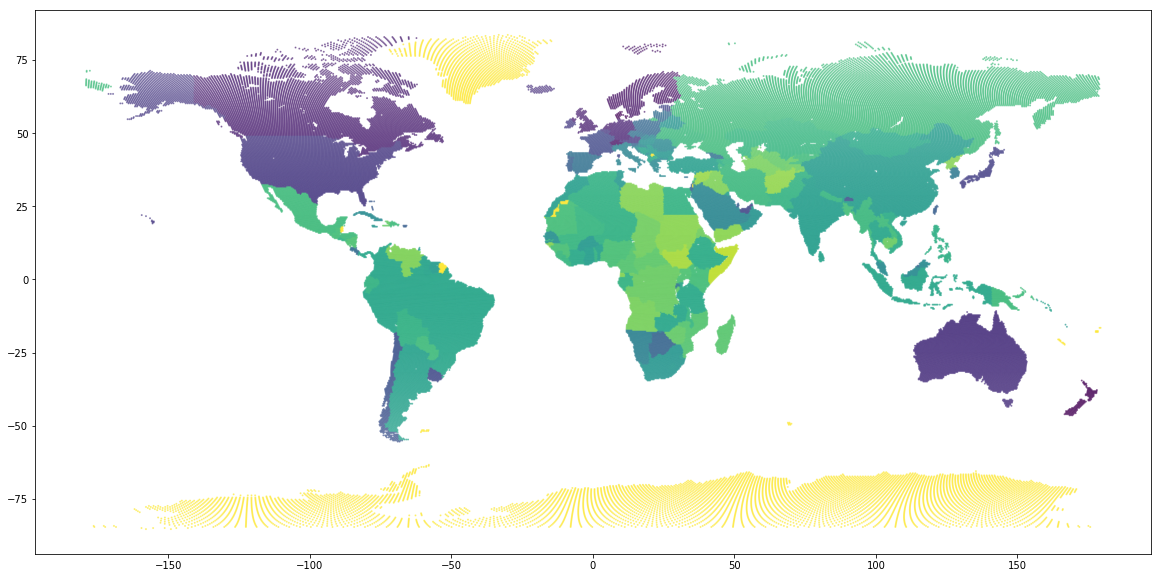

In [88]:
plt.figure(figsize=(20,10))
C = [ 100 if pd.isna(v) else 100-v for v in country_features['TI_CPI__TI_CPI_CPISN'].values ]
#C = [ 0 if pd.isna(v) else v for v in country_features['WB_SD__SL_TLF_ACTI_MA_ZS'].values ]
plt.scatter(land_grid.long, land_grid.lat, s=1, c=C, alpha=0.5)
#plt.colorbar(cb)
#plt.xlim([-10,20])
#plt.ylim([30,60])

## Store the grid and features

In [11]:
# Store the grid
land_grid.to_pickle('data/grid_500.pkl')
# Store the features
latlong_features.to_pickle('data/grid_500_latlong_features.pkl')